# Exercise 06:  nearest neighbor classification

In [1]:
import numpy as np
from matplotlib import pylab as plt

# Nearest neighbor classification

The nearest neighbor classifier is one of the simplest machine learning methods available.
Here's the simplest version of it:

```
Nearest neighbor classifier

- Find the example in the training data that is closest to
  the example that needs to be classified.
- Return its label.
```

And the code:

In [ ]:
def distance(x1, x2):
    return np.linalg.norm(x1-x2)

class nearest_neighbor:
    def __init__(self):
        pass
    def fit(self, X, y):
        self.X = X
        self.y = y
    def get_nearest(self, x):
        distances = [distance(x, self.X[i]) for i in range(len(self.X))]
        return np.argmin(distances)
    def predict(self, x) :
        return self.y[self.get_nearest(x)]

### Part 1:  Accuracy with increasing levels of noise

The nearest neighbor classifier is not robust to the presence of noisy features.  To demonstrate that, use the dataset below and add increasing number of noisy features.  Compute the accuracy of the classifier as you add an increasing number of noise features.

Noise features can be added using the numpy [normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal) method of a random number generator, which samples random numbers from a normal distribution.
For example:

In [4]:
from numpy.random import default_rng
rng = default_rng(1)
# parameters of rng.normal:
# mean, standard deviation, and size of the output array
rng.normal(0, 0.5, size=(2,3))

array([[ 0.1727921 ,  0.41080907,  0.16521854],
       [-0.65157862,  0.45267793,  0.22318729]])

For this exercise, use the following dataset in two dimensions for which the nearest neighbor classifier performs well:

np.float64(0.9)

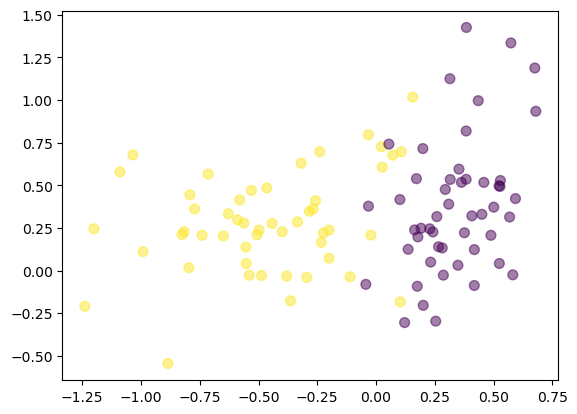

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X,y = make_classification(n_samples=100, n_features=2, n_informative=2, 
                          n_redundant=0, n_repeated=0, n_classes=2, 
                          n_clusters_per_class=1, class_sep=0.35, 
                          random_state=1)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, s=50)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.3, shuffle=True, random_state=1)
nn = nearest_neighbor()
nn.fit(X_train, y_train)
y_pred = np.array([nn.predict(X_test[i]) for i in range(len(X_test))])

np.sum(y_pred == y_test)/len(y_test)

To add the noise features to the feature matrix we will use the NumPy [hstack](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html) method.  For example to add two noise features:

In [6]:
num_noise = 2
X_train_noise = np.hstack((X_train, 
                           rng.normal(0, 0.5, size=(len(X_train),num_noise))))
X_test_noise = np.hstack((X_test, 
                          rng.normal(0, 0.5, size=(len(X_test),num_noise)))) 

Now the data has four dimensions:

In [7]:
X_train_noise.shape, X_test_noise.shape

((70, 4), (30, 4))

To explore the sensitivity of the nearest neighbor classifier to noise, add an increasing number of noise features, and plot the accuracy of the classifier on the test set as a function of the number of noise features.
In your experiment vary the number of noise features and use the following values for the number of noise features:  `[2, 4, 8, 16, 32]`.  

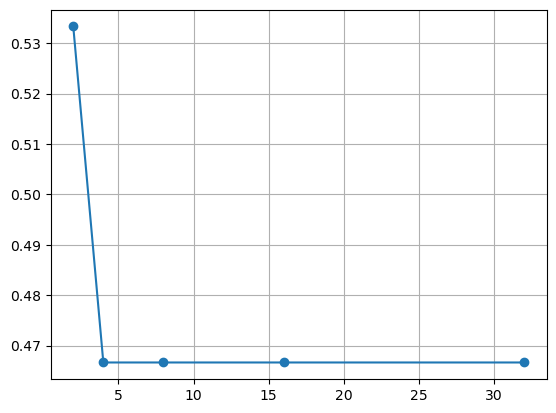

In [10]:
nums_noise_features = [2, 4, 8, 16, 32]
accuracy_results = []
for num_noise_features in nums_noise_features:
  X_train_noise = np.hstack((X_train, 
                              rng.normal(0, 0.5, size=(len(X_train), num_noise_features))))
  X_test_noise = np.hstack((X_test, 
                              rng.normal(0, 0.5, size=(len(X_test), num_noise_features))))
  nn.fit(X_train_noise, y_train)
  y_pred = nn.predict(X_test_noise)
  accuracy = np.sum(y_pred == y_test) / len(y_test)
  accuracy_results.append(accuracy) 

plt.plot(nums_noise_features, accuracy_results, marker='o') 
plt.grid(True)
plt.show()

### Part 2:  a faster NumPy implementation of the nearest neighbor classifier

Our implementation of the nearest neighbor algorithm has a for loop in the `get_nearest` method.  As we have seen, "vectorizing" our Python code and removing for loops provides a big improvement in performance.   Your task is to improve our naive implementation by eliminating this for loop.  To demonstrate the benefit of doing so, compare the running time of your implementation with our naive implementation (recall that `%timeit` can be used to time the execution of a statement).

In [12]:
class fast_nearest_neighbor:
    def __init__(self):
        pass
    def fit(self, X, y):
        self.X = X
        self.y = y
    def get_nearest(self, x):
        distances = np.linalg.norm(self.X - x, axis=1)
        return np.argmin(distances)
    def predict(self, x) :
        return self.y[self.get_nearest(x)]
    

**Comment:**  Just because your implementation contains fewer for loops doesn't mean it's necessarily faster.  For example, scipy has a method called `cdist` that computes all pairwise distances between two matrices.  However, their implementation performs the requisite for loops in Python, which would make such an implementation slower than what you can create here.  So, need I say, do not use that function?

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.3, shuffle=True, random_state=1)
nn = nearest_neighbor()
nn.fit(X_train, y_train)
y_pred = np.array([nn.predict(X_test[i]) for i in range(len(X_test))])

%timeit
fnn = fast_nearest_neighbor()
fnn.fit(X_train, y_train)
np.array([fnn.predict(X_test[i]) for i in range(len(X_test))])

np.sum(y_pred == y_test)/len(y_test)

np.float64(0.9)